In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch
import torch.nn.functional as F


In [51]:
train_dataset=CIFAR10(root='data/',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=CIFAR10(root='data/',train=False,transform=transforms.ToTensor(),download=True)

Files already downloaded and verified
Files already downloaded and verified


1


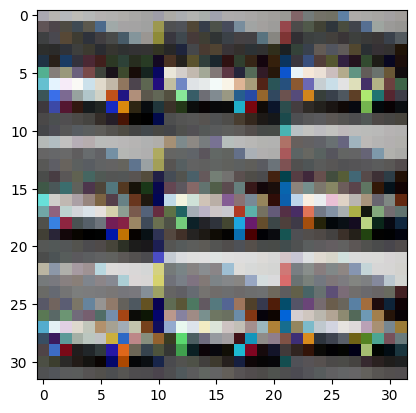

In [52]:
img,label=train_dataset[4]
plt.imshow(img.reshape(32,32,3))
# plt.imshow(img.reshape(()))
print(label)

In [53]:
## split the train dataset into train and validation dataset
def train_val_split(n,n_val):
    val_len=int(n_val*n)
    train_len=n-val_len
    idx=np.random.permutation(n)
    return idx[:train_len], idx[train_len:]

In [54]:
train_idx,val_idx=train_val_split(len(train_dataset),0.1)

In [55]:
### training sampler and dataloader
train_sampler=SubsetRandomSampler(train_idx)
train_dataloader=DataLoader(dataset=train_dataset,batch_size=16,sampler=train_sampler,num_workers=2)

### validation sampler and dataloader
val_sampler=SubsetRandomSampler(val_idx)
val_dataloader=DataLoader(dataset=train_dataset,batch_size=16,sampler=val_sampler,num_workers=2)

In [56]:
input_size=3*32*32
classes=10

In [57]:
class MLP(nn.Module):
    def __init__(self,input_size,classes):
        super().__init__()
        self.l1=nn.Linear(in_features=input_size,out_features=input_size*4,bias=True)
        self.l2=nn.Linear(in_features=input_size*4,out_features=input_size*8,bias=True)
        # self.l3=nn.Linear(in_features=input_size*8,out_features=input_size*16,bias=True)
        # self.l4=nn.Linear(in_features=input_size*16,out_features=input_size*8,bias=True)
        self.l5=nn.Linear(in_features=input_size*8, out_features=input_size*2,bias=True)
        self.relu=nn.ReLU()
        self.dropout=nn.Dropout(p=0.2)

    def forward(self,x):
        x1=self.relu(self.l1(x))
        x2=self.relu(self.l2(x1))
        # x3=self.relu(self.l3(x2))
        # x4=self.relu(self.l4(x3))
        x5=self.relu(self.l5(x2))
        x6=nn.Softmax(x5)
        return x5


In [58]:
model=MLP(input_size,classes)
model

RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1207959552 bytes.

In [ ]:
### train model
def train(model,epochs,train_dataloader,val_dataloader,learning_rate):
    ##optimiser
    optimiser=torch.optim.Adam(params=model.parameters(),lr=learning_rate)
    ##loss 
    loss_func=F.cross_entropy
    training_loss=[]
    
    for epoch in range(epochs):
        for x,y in train_dataloader:
            out=model(x)
            print(out)
            break
        break






In [ ]:
train(model,1,train_dataloader,val_dataloader,0.001)